In [ ]:
import  pandas  as  pd
import  numpy  as  np
import  matplotlib.pyplot  as  plt
import  seaborn  as  sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import   os
os.environ['KAGGLE_USERNAME']=  "jyotiaggarwal2"
os.environ['KAGGLE_KEY']=  "7b2a1a1b5c224e6325824c621e0025c4"
!kaggle datasets download -d deepcontractor/supreme-court-judgment-prediction

  0% 0.00/1.33M [00:00<?, ?B/s]
100% 1.33M/1.33M [00:00<00:00, 75.5MB/s]


In [ ]:
!unzip supreme-court-judgment-prediction

Archive:  supreme-court-judgment-prediction.zip
  inflating: justice.csv             


In [ ]:
data=pd.read_csv('/content/justice.csv',encoding='latin',)

In [ ]:
data.columns

Index(['Unnamed: 0', 'ID', 'name', 'href', 'docket', 'term', 'first_party',
       'second_party', 'facts', 'facts_len', 'majority_vote', 'minority_vote',
       'first_party_winner', 'decision_type', 'disposition', 'issue_area'],
      dtype='object')

In [ ]:
data.dtypes

Unnamed: 0             int64
ID                     int64
name                  object
href                  object
docket                object
term                  object
first_party           object
second_party          object
facts                 object
facts_len              int64
majority_vote          int64
minority_vote          int64
first_party_winner    object
decision_type         object
disposition           object
issue_area            object
dtype: object

In [ ]:
data.head(5)

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,0,50606,Roe v. Wade,https://api.oyez.org/cases/1971/70-18,70-18,1971,Jane Roe,Henry Wade,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,majority opinion,reversed,NaN
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,"Peter Stanley, Sr.",Illinois,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,John Giglio,United States,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,Sally Reed,Cecil Reed,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,Marvin Miller,California,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment


In [ ]:
data.isna().sum()

Unnamed: 0              0
ID                      0
name                    0
href                    0
docket                  0
term                    0
first_party             1
second_party            1
facts                   0
facts_len               0
majority_vote           0
minority_vote           0
first_party_winner     15
decision_type           7
disposition            72
issue_area            142
dtype: int64

In [ ]:
print(data.duplicated().sum())

0


In [ ]:
data=data.drop(columns=['first_party','second_party'])

In [ ]:
data.head(2)

,Unnamed: 0,ID,name,href,docket,term,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,0,50606,Roe v. Wade,https://api.oyez.org/cases/1971/70-18,70-18,1971,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,majority opinion,reversed,NaN
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights


In [ ]:
cat=data[['decision_type', 'disposition']]
target=data['first_party_winner']
nlp=data['facts']

In [ ]:
cat.reset_index(drop=True, inplace=True)
target.reset_index(drop=True, inplace=True)
nlp.reset_index(drop=True, inplace=True)

In [ ]:
data.isna().sum()

Unnamed: 0              0
ID                      0
name                    0
href                    0
docket                  0
term                    0
facts                   0
facts_len               0
majority_vote           0
minority_vote           0
first_party_winner     15
decision_type           7
disposition            72
issue_area            142
dtype: int64

In [ ]:
data=data.drop(columns=['issue_area'])

In [ ]:
data.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
target=le.fit_transform(target)

In [ ]:
target1=pd.DataFrame(target, columns=['first_party_winner'])

In [ ]:
target1

,first_party_winner
0,1
1,1
2,1
3,1
4,1
...,...
3298,1
3299,0
3300,1
3301,0


In [ ]:
data['first_party_winner']=target1

In [ ]:
data.head()

,Unnamed: 0,ID,name,href,docket,term,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition
0,0,50606,Roe v. Wade,https://api.oyez.org/cases/1971/70-18,70-18,1971,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,1,majority opinion,reversed
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,<p>Joan Stanley had three children with Peter ...,757,5,2,1,majority opinion,reversed/remanded
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,<p>John Giglio was convicted of passing forged...,495,7,0,1,majority opinion,reversed/remanded
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,"<p>The Idaho Probate Code specified that ""male...",378,7,0,1,majority opinion,reversed/remanded
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,"<p>Miller, after conducting a mass mailing cam...",305,5,4,1,majority opinion,vacated/remanded


In [ ]:
data['decision_type'] = le.fit_transform(data['decision_type'])

In [ ]:
data['decision_type'] = pd.to_numeric(data['decision_type'])

In [ ]:
data.head(5)

,Unnamed: 0,ID,name,href,docket,term,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition
0,0,50606,Roe v. Wade,https://api.oyez.org/cases/1971/70-18,70-18,1971,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,1,5,reversed
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,<p>Joan Stanley had three children with Peter ...,757,5,2,1,5,reversed/remanded
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,<p>John Giglio was convicted of passing forged...,495,7,0,1,5,reversed/remanded
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,"<p>The Idaho Probate Code specified that ""male...",378,7,0,1,5,reversed/remanded
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,"<p>Miller, after conducting a mass mailing cam...",305,5,4,1,5,vacated/remanded


In [ ]:
data.dtypes

Unnamed: 0             int64
ID                     int64
name                  object
href                  object
docket                object
term                  object
facts                 object
facts_len              int64
majority_vote          int64
minority_vote          int64
first_party_winner     int64
decision_type          int64
disposition           object
dtype: object

In [ ]:
df=data[['majority_vote','minority_vote','first_party_winner','decision_type']]
df

,majority_vote,minority_vote,first_party_winner,decision_type
0,7,2,1,5
1,5,2,1,5
2,7,0,1,5
3,7,0,1,5
4,5,4,1,5
...,...,...,...,...
3298,9,0,1,5
3299,9,0,0,5
3300,9,0,1,5
3301,9,0,0,5


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train , test = train_test_split(df , test_size=0.2, random_state = 42)

In [ ]:
X_train = train.drop(['first_party_winner'],1)
X_test = test.drop(['first_party_winner'],1)

Y_train = train['first_party_winner']
Y_test = test['first_party_winner']

In [ ]:
X_train.shape, Y_train.shape

((2642, 3), (2642,))

In [ ]:
X_test.shape , Y_test.shape

((661, 3), (661,))

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
model.score(X_train,Y_train)

0.011763406383198838

In [ ]:
data.dtypes

Unnamed: 0             int64
ID                     int64
name                  object
href                  object
docket                object
term                  object
facts                 object
facts_len              int64
majority_vote          int64
minority_vote          int64
first_party_winner    object
decision_type          int64
disposition           object
issue_area            object
dtype: object

In [ ]:
data.shape

(3303, 14)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming the 'text_column' contains the text data in your dataset
text_data = data['facts']

# Split the data into features (X) and target (y)
X_text = text_data.values
y = data['facts']

# Split data into training and testing sets
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

# Convert the TF-IDF matrix to a dense numpy array
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(data['first_party_winner'])

In [ ]:
data.head()

,Unnamed: 0,ID,name,href,docket,term,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition
0,0,50606,Roe v. Wade,https://api.oyez.org/cases/1971/70-18,70-18,1971,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,1,5,reversed
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,<p>Joan Stanley had three children with Peter ...,757,5,2,1,5,reversed/remanded
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,<p>John Giglio was convicted of passing forged...,495,7,0,1,5,reversed/remanded
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,"<p>The Idaho Probate Code specified that ""male...",378,7,0,1,5,reversed/remanded
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,"<p>Miller, after conducting a mass mailing cam...",305,5,4,1,5,vacated/remanded


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your dataset
# For demonstration purposes, let's assume your dataset is loaded into a DataFrame named 'data'
# 'case_description' is the column containing case descriptions, and 'outcome' is the target variable

# Preprocessing
X = data['facts']
y = data['first_party_winner']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a support vector machine (SVM) classifier
clf = SVC()
clf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6630434782608695


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
model.score(X_test_tfidf,y_test)

0.6708074534161491

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.67


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.03      0.05       211
           1       0.68      0.98      0.80       433

    accuracy                           0.67       644
   macro avg       0.57      0.51      0.43       644
weighted avg       0.61      0.67      0.56       644

Confusion Matrix:
[[  6 205]
 [  7 426]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test_tfidf)
model.score(X_test_tfidf,y_test)

0.5232919254658385

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.52


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.32      0.30       211
           1       0.65      0.62      0.64       433

    accuracy                           0.52       644
   macro avg       0.47      0.47      0.47       644
weighted avg       0.53      0.52      0.53       644

Confusion Matrix:
[[ 67 144]
 [163 270]]


In [ ]:
data.head()

,Unnamed: 0,ID,name,href,docket,term,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition
0,0,50606,Roe v. Wade,https://api.oyez.org/cases/1971/70-18,70-18,1971,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,1,5,reversed
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,<p>Joan Stanley had three children with Peter ...,757,5,2,1,5,reversed/remanded
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,<p>John Giglio was convicted of passing forged...,495,7,0,1,5,reversed/remanded
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,"<p>The Idaho Probate Code specified that ""male...",378,7,0,1,5,reversed/remanded
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,"<p>Miller, after conducting a mass mailing cam...",305,5,4,1,5,vacated/remanded


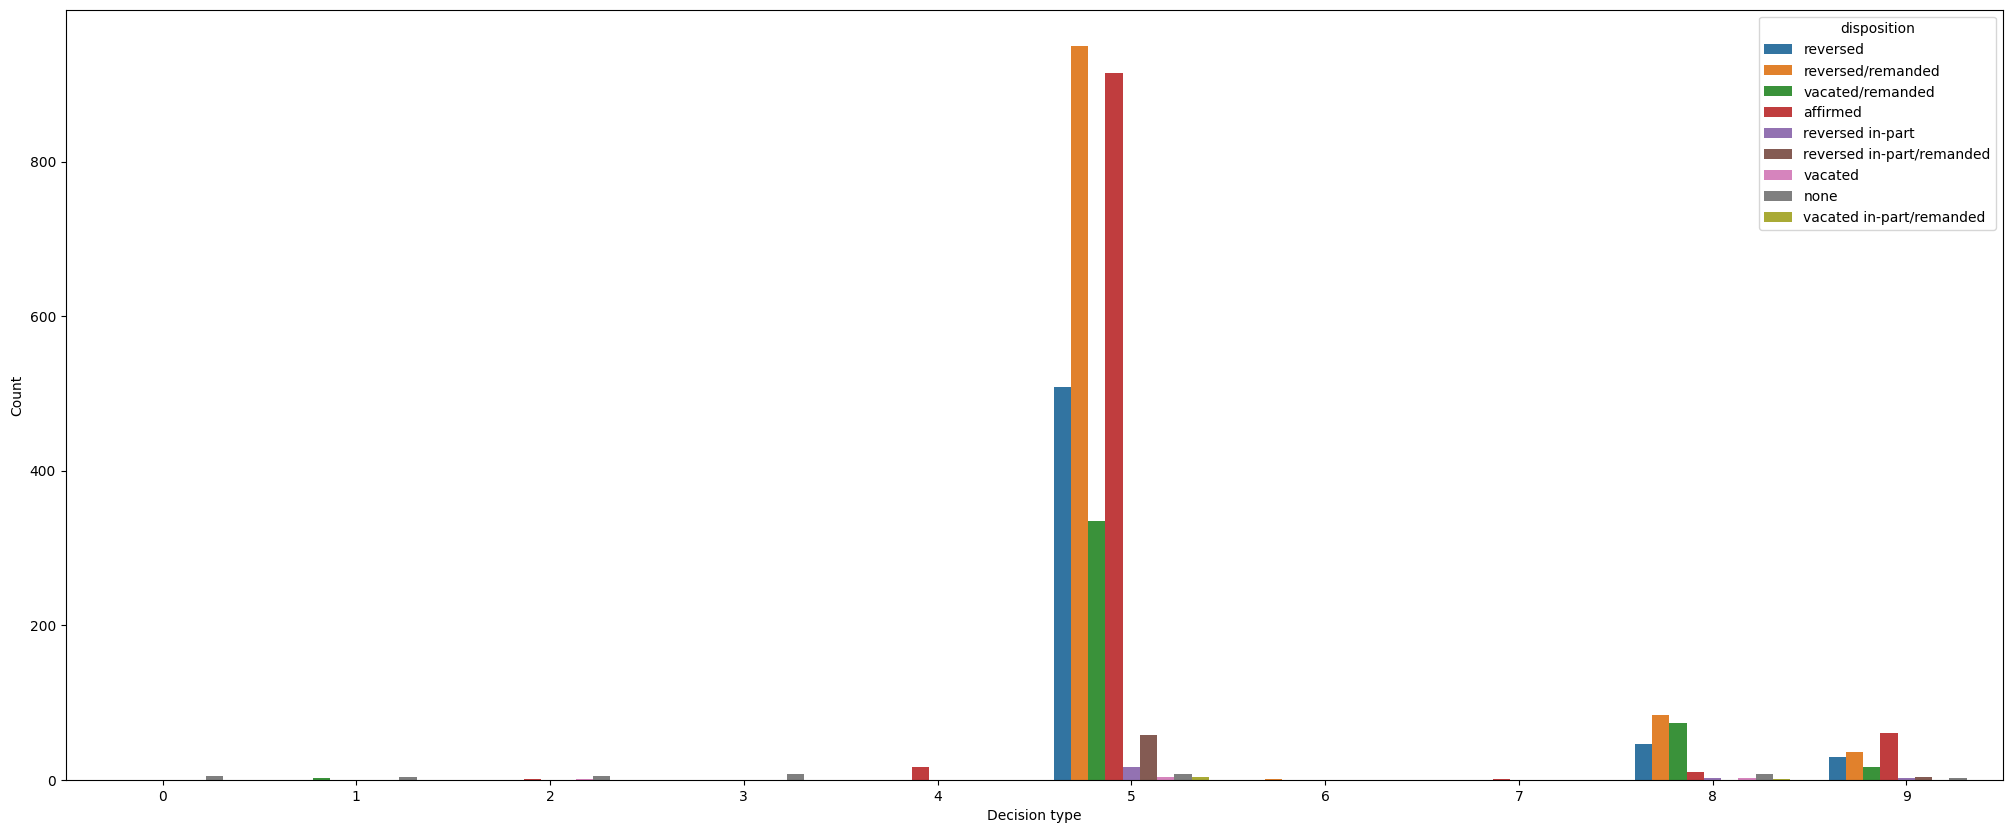

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(x='decision_type', hue='disposition', data=data)
plt.xlabel("Decision type")
plt.ylabel("Count")
plt.show()

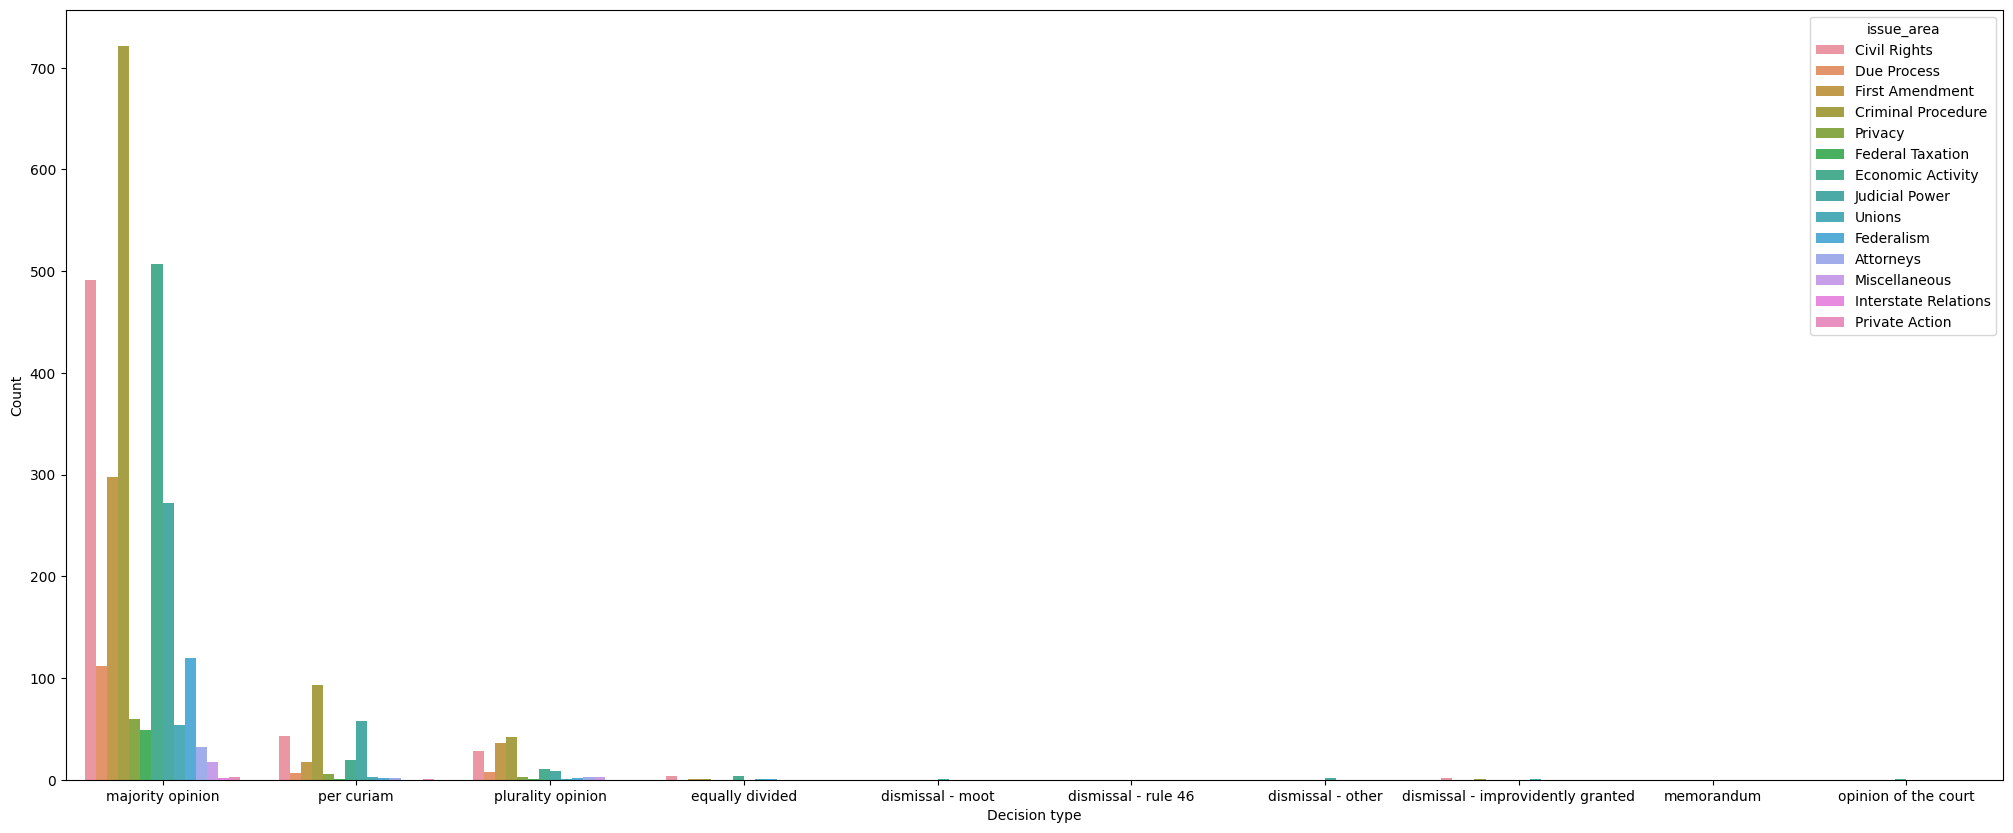

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(x='decision_type', hue='issue_area', data=data)
plt.xlabel("Decision type")
plt.ylabel("Count")
plt.show()

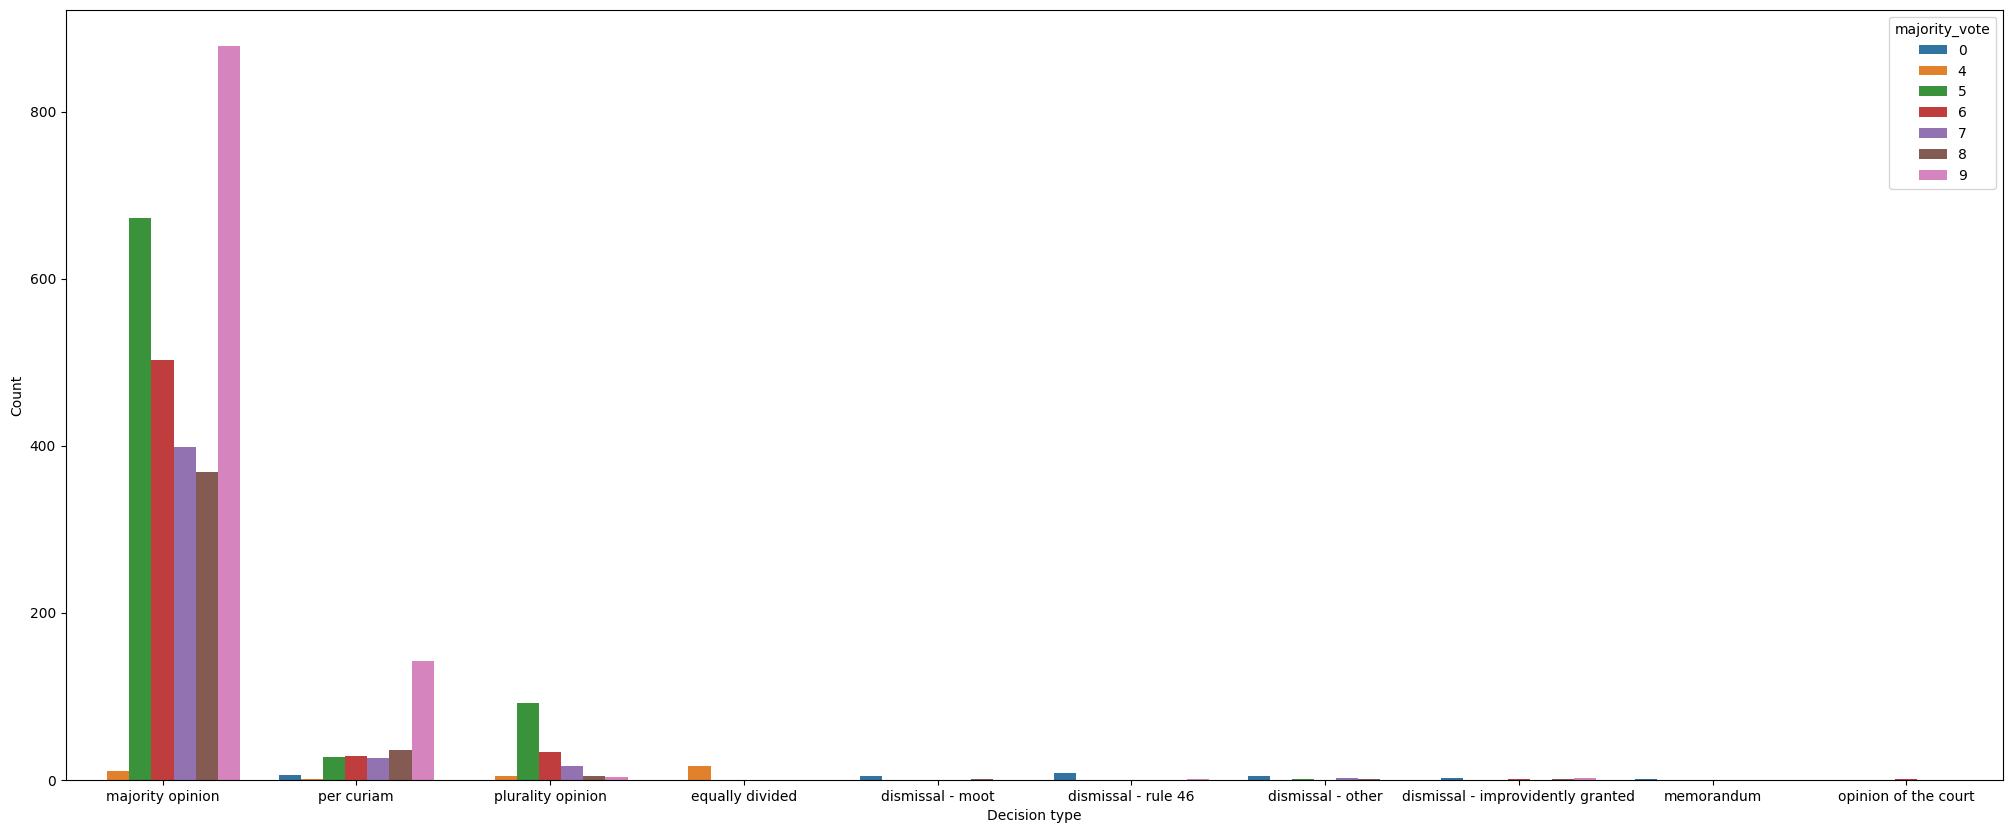

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(x='decision_type', hue='majority_vote', data=data)
plt.xlabel("Decision type")
plt.ylabel("Count")
plt.show()

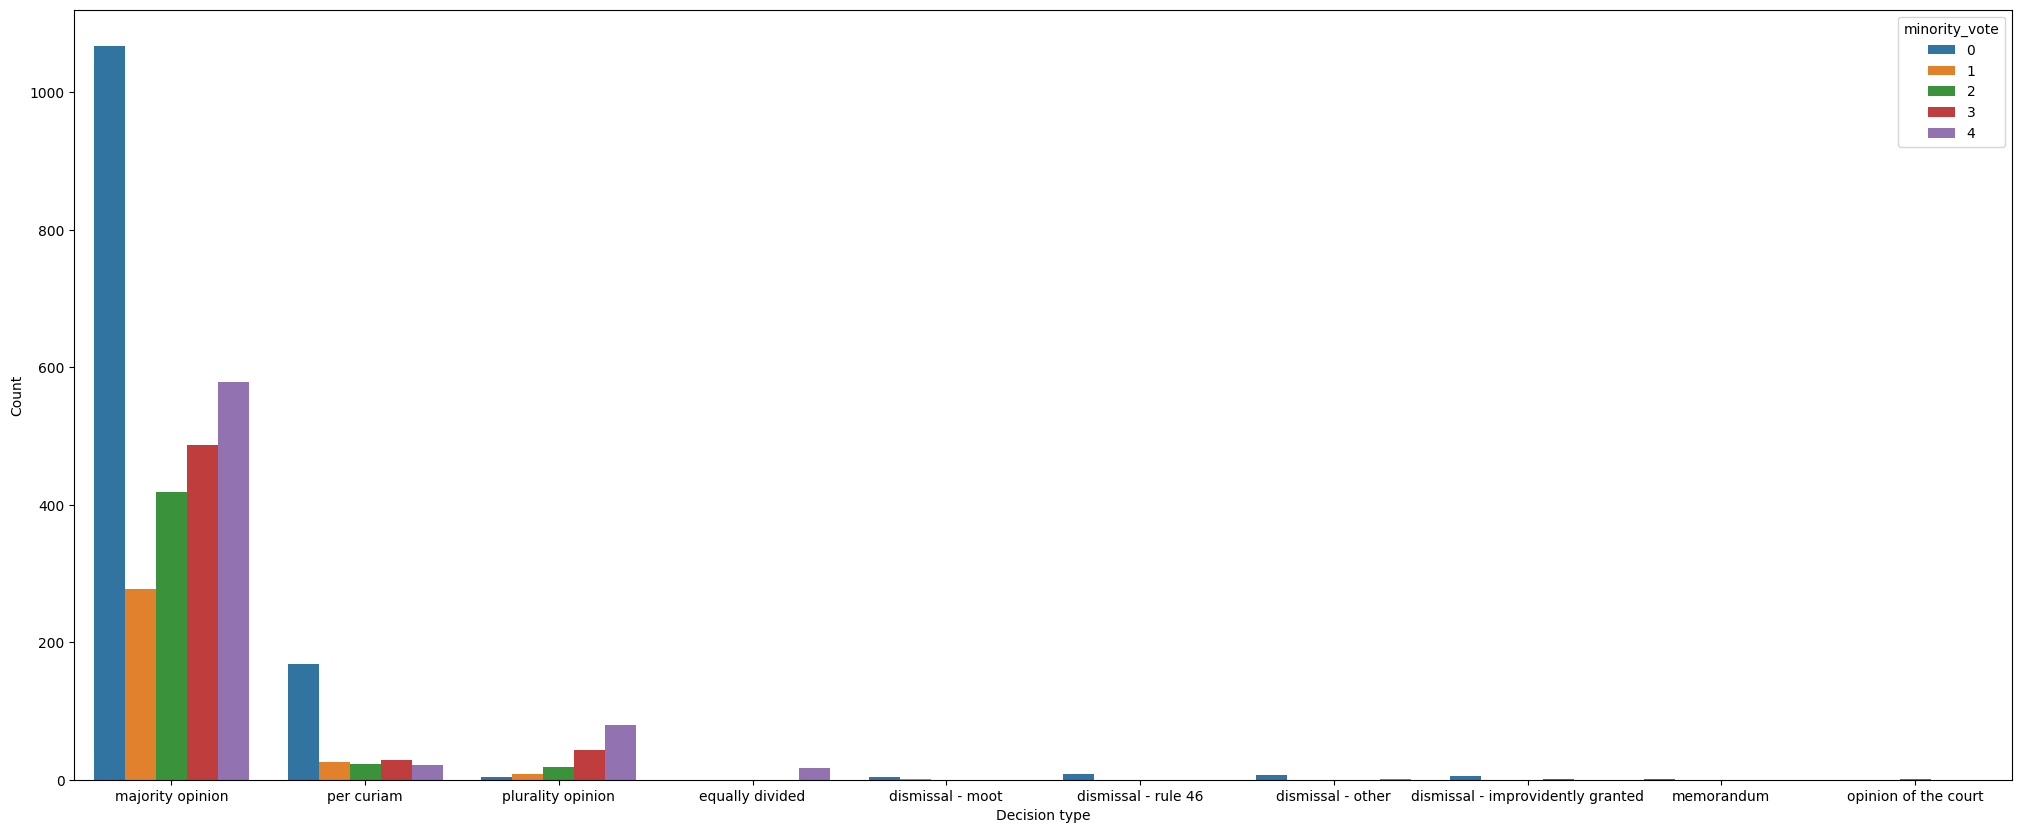

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(x='decision_type', hue='minority_vote', data=data)
plt.xlabel("Decision type")
plt.ylabel("Count")
plt.show()

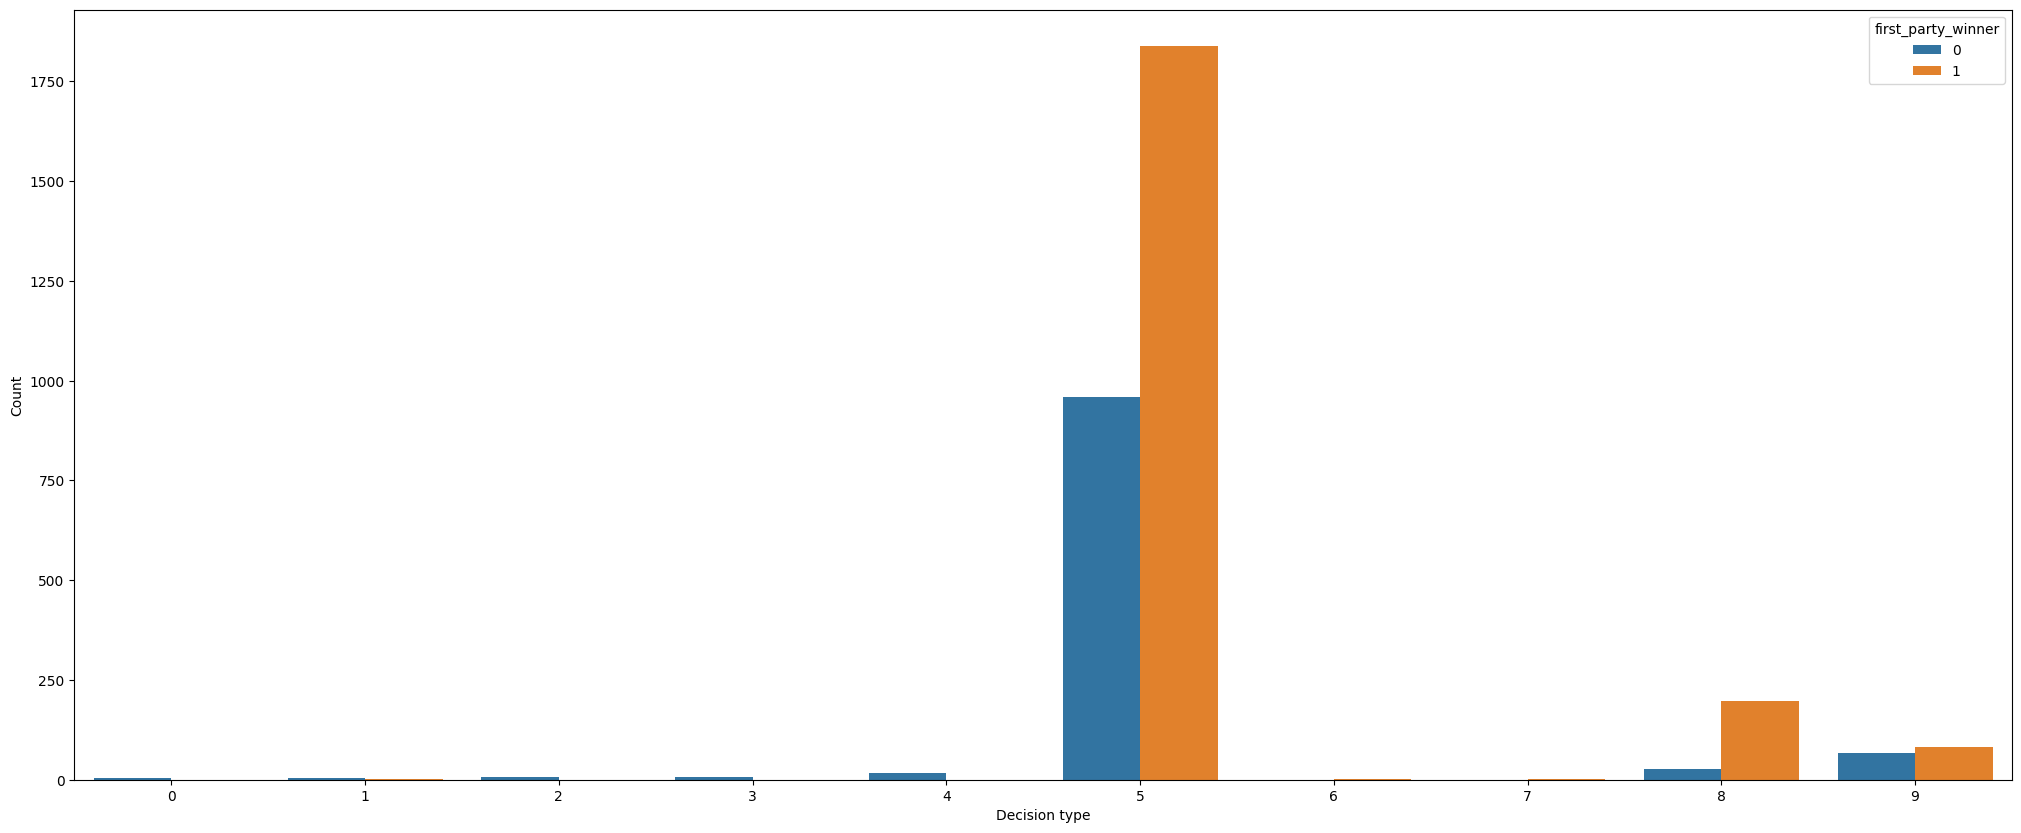

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(x='decision_type', hue='first_party_winner', data=data)
plt.xlabel("Decision type")
plt.ylabel("Count")
plt.show()

In [ ]:
# plt.figure(figsize=(20,10))
# sns.countplot(x='disposition', hue='decision_type', data=data)
# plt.xlabel("Decision type")
# plt.ylabel("Count")
# plt.show()